In [1]:
import os
os.environ['KERAS_BACKEND']="theano"

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras import backend as K


Using Theano backend.


In [3]:
K.set_image_dim_ordering('th')

In [4]:
batch_size = 100
nb_classes = 10

In [5]:
img_row, img_col = 28,28

In [6]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [10]:
X_train = X_train.reshape(X_train.shape[0], 1, img_row, img_col)
X_test = X_test.reshape(X_test.shape[0], 1, img_row, img_col)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /=255
print ('X_train shape:', X_train.shape)
print (X_train.shape[0], 'Train Samples')
print (X_test.shape[0], 'Test Samples')


X_train shape: (60000, 1, 28, 28)
60000 Train Samples
10000 Test Samples


In [12]:
Y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [8]:
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)
print ("One hot encoding: {}" .format(Y_train[0:9,:]))

One hot encoding: [[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


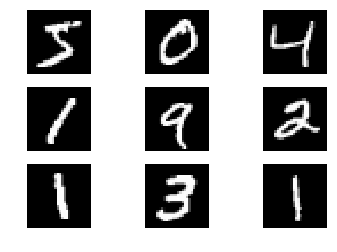

In [9]:
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(X_train[i,0],cmap='gray')
    plt.axis("off")

In [12]:
model = Sequential()

model.add(Convolution2D(6, (5, 5), input_shape = (1, img_row, img_col), padding ="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(16,(5,5), padding = "same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(120,(5,5)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta')

In [14]:
nb_epoch = 1

model.fit(X_train, Y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test,Y_test))
score= model.evaluate(X_test, Y_test, verbose = 0)
print('Test Score: ', score)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 37s - loss: 0.3916 - val_loss: 0.0836
Test Score:  0.0836313470479


9/9 [==============================] - 0s


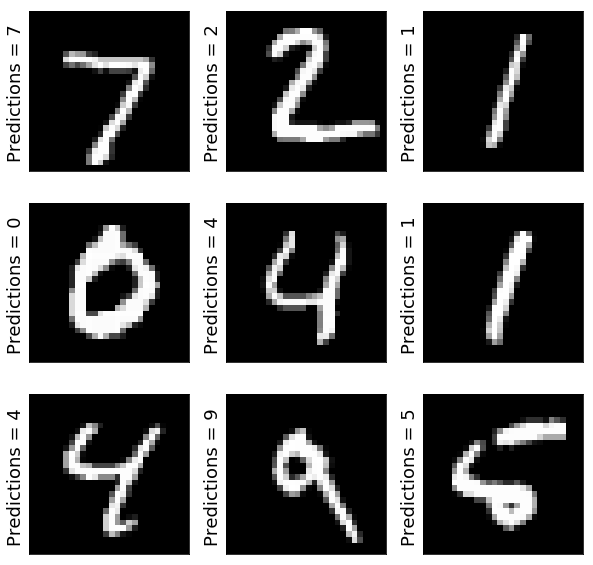

In [15]:
res = model.predict_classes(X_test[:9])
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i,0],cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel("Predictions = %d " %res[i], fontsize= 18)